# Importar datos

In [3]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
help(TFBertForSequenceClassification)
#model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")

Help on class TFBertForSequenceClassification in module transformers.models.bert.modeling_tf_bert:

class TFBertForSequenceClassification(TFBertPreTrainedModel, transformers.modeling_tf_utils.TFSequenceClassificationLoss)
 |  TFBertForSequenceClassification(*args, **kwargs)
 |  
 |  Bert Model transformer with a sequence classification/regression head on top (a linear layer on top of the pooled
 |  output) e.g. for GLUE tasks.
 |  
 |  
 |  This model inherits from :class:`~transformers.TFPreTrainedModel`. Check the superclass documentation for the
 |  generic methods the library implements for all its model (such as downloading or saving, resizing the input
 |  embeddings, pruning heads etc.)
 |  
 |  This model is also a `tf.keras.Model <https://www.tensorflow.org/api_docs/python/tf/keras/Model>`__ subclass. Use
 |  it as a regular TF 2.0 Keras Model and refer to the TF 2.0 documentation for all matter related to general usage
 |  and behavior.
 |  
 |  .. note::
 |  
 |      TF 2.0 

In [1]:
# DataFrame
import pandas as pd

pd.set_option("display.max_colwidth", None)

# Scripts
from Scripts.TweetCleaner import TweetCleaner

# Matplot
%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use("dark_background")

# Utilidad
from collections import Counter

# Set log
import logging

logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)

In [7]:
# Dataset
DATASET_COLUMNS = ["sentiment", "id", "date", "query", "user", "text"]
# DATASET_ENCODING = "ISO-8859-1"
DATASET_PATH = "C:/Users/Bisite/Downloads/data.csv"
TEST_SIZE = 0.8
# Sentimientos
POSITIVE = "Positivo"
NEUTRAL = "Neutral"
NEGATIVE = "Negativo"

from sklearn.datasets import fetch_20newsgroups
import pandas as pd

print("Leyendo fichero:", DATASET_PATH)
tweets = pd.read_csv(DATASET_PATH, sep=";")
print(f"Tamaño del dataset leído: {len(tweets)} tweets")
tweets.head()
# data = fetch_20newsgroups(subset="all")["data"]

Leyendo fichero: C:/Users/Bisite/Downloads/data.csv
Tamaño del dataset leído: 177509 tweets


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,noticia,link_noticia,web,usuario,id_usuario,fecha_envio,fecha_publicacion,meneos,clicks,comentarios,votos_positivos,votos_anonimos,votos_negativos,karma,sub,extracto
0,2869055,Ruptura inesperada de un iceberg gigante desprendido del mayor glaciar antártico vista por satélite (ING),https://www.bas.ac.uk/media-post/giant-west-antarctic-iceberg-disintegrates/,bas.ac.uk,jm22381,21061,1512164817,1512382803,73,1057,10,55,18,2,340,cultura,"Una animación del iceberg gigante que nació del Glaciar Pine Island en la Antártida Occidental hace poco más de dos meses muestra una ruptura inesperada vista por satélite. -Lo que estamos presenciando en Pine Island es preocupante. Ahora estamos viendo cambios en el comportamiento de la plataforma de hielo, cuando durante 68 años vimos un patrón de avance y retroceso que resultó en el nacimiento de un solo iceberg grande- dice Robert Larter, geofísico marino de British Antarctic Survey. En español:"
1,2869761,"El MIT logra hacer escáneres 3D baratos 1,000 veces mejor [ENG]",https://gizmodo.com/mit-figured-out-how-to-make-cheap-3d-scanners-1-000-tim-1745454853,gizmodo.com,CalzadorCalzado,553023,1512352183,1512381302,73,772,17,43,30,1,331,tecnología,"Los científicos ya desarrollaron una tecnología de imágenes tridimensionales bastante buena hace tiempo. También han desarrollado tecnologías de imagen 3D barata. Conseguir algo bueno y barato siempre ha sido difícil, pero los investigadores del MIT han logrado un avance usando la polarización pasada de moda. La calidad no solo es buena, es genial. La nueva técnica de polarización puede aumentar la resolución de cualquier dispositivo de imagen 3D convencional y económico por un factor de 1.000."
2,2869841,"“Lárgame un cilindrín, fotero”",http://www.teknoplof.com/2017/12/04/largame-un-cilindrin-fotero/,teknoplof.com,gobolino,511338,1512377483,1512379520,89,1608,34,53,36,5,396,ocio,"‘La gran superproducción‘ es, sin ningún género de dudas, uno de los ejemplares grandes, enormes, inmensos, descomunales del mundo del cómic español. Su protagonista, Superlópez, es un personaje de ficción —actor principal de una serie de historietas del mismo nombre— creado por el dibujante leonés Jan (Juan López Fernández) y aparecido por primera vez en 1973."
3,2869859,"El Tribunal Supremo deja en prisión a Junqueras, Forn y los -Jordis-",http://www.eldiario.es/politica/Tribunal-Supremo-prision-ordena-excarcelar_0_714628947.html,eldiario.es,Raditz,382296,1512378799,1512379503,171,889,90,98,73,1,452,actualidad,"El juez Llarena acuerda libertad previo pago de una fianza de 100.000 euros para Romeva, Bassa, Mundò, Josep Rull, Jordi Turull y Meritxell Borràs."
4,2869823,La Fiscalía pide imputar a Aguirre y Gallardón en el caso Lezo,http://www.elboletin.com/noticia/156624/nacional/la-fiscalia-pide-imputar-a-aguirre-y-gallardon-en-el-caso-lezo.html,elboletin.com,Danichaguito,407263,1512375033,1512379203,354,353,39,144,210,0,324,actualidad,"La Fiscalía en el caso Lezo ha solicitado imputar a los expresidentes de la Comunidad de Madrid Esperanza Aguirre y Alberto Ruíz Gallardón. Los fiscales ven indicios para investigar a ambos políticos del PP en el marco de la Operación Lezo, que investiga la presunta trama corrupta con epicentro en la empresa pública de aguas Canal Isabel II. En concreto, el Ministerio Público personado en el caso cree que Gallardón debe ser investigado por la compra de la empresa Inassa en 2001. Este punto ya se conocía desde que en septiembre se publicara.."


In [8]:
tc = TweetCleaner(tweets.noticia)

tc.clearPunctuaction()
data = tc.text
print(data[0:10])

0           ruptura inesperada de un iceberg gigante desprendido del mayor glaciar antártico vista por satélite ing 
1                                                               el mit logra hacer escáneres  baratos  veces mejor  
2                                                                                     “lárgame un cilindrín fotero” 
3                                                 el tribunal supremo deja en prisión a junqueras forn y los jordis 
4                                                    la fiscalía pide imputar a aguirre y gallardón en el caso lezo 
5                                           el paro sube en noviembre en  personas y encadena cuatro meses de alzas 
6                                                           una mujer con síndrome de rokitansky consigue dar a luz 
7     los trabajadores podrán disfrutar o cobrar las vacaciones pendientes de todos los años anteriores sin límites 
8                                                               

# Embeddings

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("distilbert-base-nli-mean-tokens")
embeddings = model.encode(data, show_progress_bar=True)

2021-07-28 17:17:25,330 : INFO : Load pretrained SentenceTransformer: distilbert-base-nli-mean-tokens
2021-07-28 17:17:26,134 : INFO : Use pytorch device: cuda


Batches:   0%|          | 0/5548 [00:00<?, ?it/s]

In [10]:
import numpy as np
np.savez("./outfile2.npz", x = embeddings)

embeddings = np.load("./outfile2.npz")['x']
print(embeddings.size)
print(embeddings)

# Clustering

## UMAP

Téncnica de reducción de dimensión. Mantiene la estructura incluso en dimensiones bajas.

In [12]:
import umap

umap_embeddings = umap.UMAP(
    n_neighbors=15, n_components=5, metric="cosine"
).fit_transform(embeddings)

In [13]:
np.savez("./outfile3.npz", x = umap_embeddings)


In [14]:
data.to_csv(index=False, path_or_buf='out.csv')

## HDBSCAN

Algoritmo de clustering de documentos basado en densidad.

In [15]:
import hdbscan

cluster = hdbscan.HDBSCAN(
    min_cluster_size=15, metric="euclidean", cluster_selection_method="eom"
).fit(umap_embeddings)

2021-07-28 17:39:31,672 : INFO : Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-07-28 17:39:31,672 : INFO : NumExpr defaulting to 8 threads.


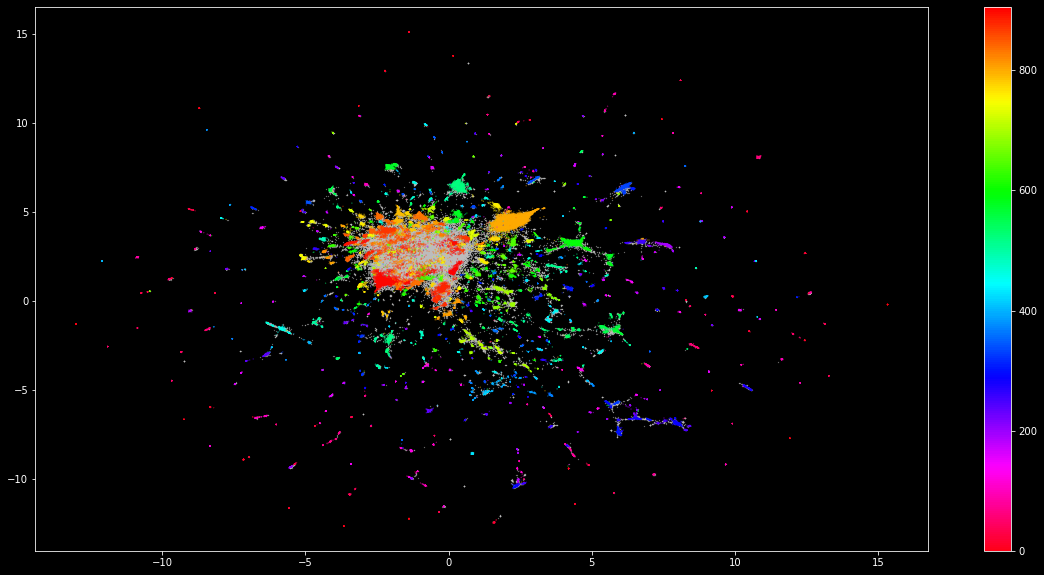

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
umap_data = umap.UMAP(
    n_neighbors=15, n_components=2, min_dist=0.0, metric="cosine"
).fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=["x", "y"])
result["labels"] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color="#BDBDBD", s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap="hsv_r")
plt.colorbar()

In [17]:
docs_df = pd.DataFrame(data.values, columns=["Doc"])
docs_df["Topic"] = cluster.labels_
docs_df["Doc_ID"] = range(len(docs_df))
docs_per_topic = docs_df.groupby(["Topic"], as_index=False).agg({"Doc": " ".join})

In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(
        documents
    )
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count


tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [19]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {
        label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1]
        for i, label in enumerate(labels)
    }
    return top_n_words


def extract_topic_sizes(df):
    topic_sizes = (
        df.groupby(["Topic"])
        .Doc.count()
        .reset_index()
        .rename({"Topic": "Topic", "Doc": "Size"}, axis="columns")
        .sort_values("Size", ascending=False)
    )
    return topic_sizes


top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df)
topic_sizes.head(10)

,Topic,Size
0,-1,67637
801,800,7459
523,522,2623
596,595,2283
900,899,2221
334,333,1925
288,287,1239
195,194,1181
256,255,1148
575,574,1132


Observamos los distintos tópicos y el tamaño de cada cluster. El cluster con tópico -1 indica aquellos documentos que no queda clara su clasificación dentro de un cluster.

In [20]:
tf_idf.T

array([[5.05914221e-05, 3.43249203e-05, 1.97988085e-05, ...,
        0.00000000e+00, 1.97988085e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = (
        docs_df.groupby(["Topic"])
        .count()
        .sort_values("Doc", ascending=False)
        .reset_index()
    )
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(["Topic"], as_index=False).agg({"Doc": " ".join})

    # Calculate new topic words
    m = len(data)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df)
topic_sizes.head(10)

,Topic,Size
0,-1,67713
784,783,7474
511,510,2623
584,583,2283
880,879,2221
325,324,1940
281,280,1239
191,190,1181
250,249,1148
563,562,1132


Tomamos por ejemplo el cluster número 325, y vemos las palabras con mayor relevancia dentro de él.

In [27]:
top_n_words[325]

[('avión', 0.4085959657796844),
 ('aviones', 0.21146020200877183),
 ('en', 0.053278635018112974),
 ('vuelo', 0.051284307662842324),
 ('avioneta', 0.04923714663680691),
 ('los', 0.04424194030836271),
 ('una', 0.04128861286557038),
 ('pasajeros', 0.036909207411972636),
 ('que', 0.035300478251349666),
 ('papel', 0.0351077498690869),
 ('del', 0.03505310408411937),
 ('el', 0.03334632207947987),
 ('pasajero', 0.033281989411248124),
 ('aterrizaje', 0.032640077002687264),
 ('al', 0.030217050068604458),
 ('para', 0.029882671562147387),
 ('aterriza', 0.02932388666244968),
 ('billetes', 0.028920756240537887),
 ('qué', 0.028804172862547828),
 ('por', 0.028159517426597197)]

Vemos que claramente hace referencia a un grupo de noticias sobre vuelos y aviones comerciales.